<font size=4> Ali je histogram sploh potreben, ali je zadosti vzeti kar približek pdf z uporabo npr. "gaussian kernel density estimation" (v nadaljevanju gkde)? Vemo, da je problem kernel estimatora pri porazdelitvah, določenih na intervalih (npr. beta porazdelitve), in pri porazdelitvah na intervalu $[0,\inf)$ (npr. Weibull).
    
Lahko bi naredili gkde za poljubno porazdelitev, jo omejili na interval, kjer je naša porazdelitev definirana, in omejen pdf normalizirali. Poskusimo to implementirati, v drugem delu pa bomo naredili primerjavo s histogrami.

In [1]:
import random as r
import numpy as np

weibull = list(np.random.weibull(2,600))
beta_data = list(np.random.beta(4,1,600))
gauss = list(np.random.normal(0,1,600))
uniform_data = list(np.random.uniform(0,1,600))

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm, beta, weibull_min, uniform

#tocni pdf - potrebujemo za kasneje
gauss_tocna = lambda x: norm.pdf(x,0,1)
beta_tocna = lambda x: beta.pdf(x,4,1)
weibull_tocna = lambda x: weibull_min.pdf(x,2)
uniform_tocna = lambda x: uniform.pdf(x,0,1)

gauss_pdf = gaussian_kde(gauss)
weibull_pdf = gaussian_kde(weibull)
beta_pdf = gaussian_kde(beta_data)
uniform_pdf = gaussian_kde(uniform_data)


plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Gauss")
# histogram
plt.hist(gauss,10,density=1)
#pdf (gkde)
x = np.linspace(-4,4,1000)
plt.plot(x, gauss_pdf(x))
# tocna
plt.plot(x, gauss_tocna(x))


plt.subplot(2,2,2)
plt.title("Weibull")
# histogram
plt.hist(weibull,10,density=1)
#pdf (gkde)
x = np.linspace(-0.5,4,1000)
plt.plot(x, weibull_pdf(x))
# tocna
plt.plot(x, weibull_tocna(x))


plt.subplot(2,2,3)
plt.title("Beta")
# histogram
plt.hist(beta_data,10,density=1)
#pdf (gkde)
x = np.linspace(0,1.5,1000)
plt.plot(x, beta_pdf(x))
# tocna
plt.plot(x, beta_tocna(x))


plt.subplot(2,2,4)
plt.title("Uniform")
# histogram
plt.hist(uniform_data,10,density=1)
#pdf (gkde)
x = np.linspace(-0.5,1.5,1000)
plt.plot(x, uniform_pdf(x))
# tocna
plt.plot(x, uniform_tocna(x))


plt.show()

<Figure size 1500x1000 with 4 Axes>

In [3]:
import scipy.integrate as integrate

# gauss - OK

# za ostale uredimo pdf-e

def pdf_na_int(pdf,a,b):
    # ploscina za normalizacijo
    area_on_int = integrate.quad(pdf,a,b)[0]

    def pdf_x(x):
        # omejitev obmocja in normalizacija
        return np.where(np.logical_or(np.less(x,a),np.greater(x,b)), 0, pdf(x)/area_on_int)
    
    return pdf_x

weibull_1_pdf = pdf_na_int(weibull_pdf,min(weibull),max(weibull))
beta_1_pdf = pdf_na_int(beta_pdf,min(beta_data),max(beta_data))
uniform_1_pdf = pdf_na_int(uniform_pdf,min(uniform_data),max(uniform_data))

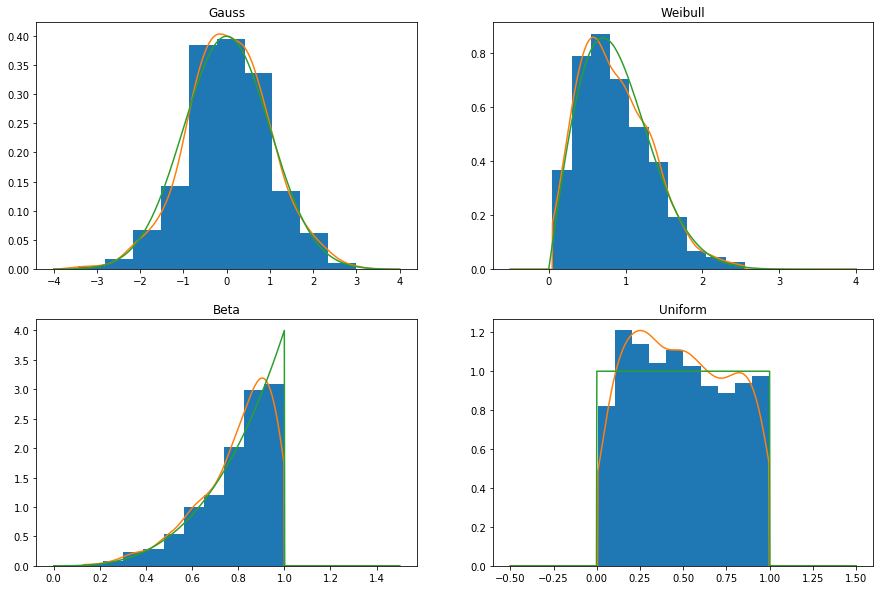

In [4]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Gauss")
# histogram
plt.hist(gauss,10,density=1)
#pdf (gkde)
x = np.linspace(-4,4,1000)
plt.plot(x, gauss_pdf(x))
# tocna
plt.plot(x, gauss_tocna(x))


plt.subplot(2,2,2)
plt.title("Weibull")
# histogram
plt.hist(weibull,10,density=1)
#pdf_na_int
x = np.linspace(-0.5,4,1000)
plt.plot(x, weibull_1_pdf(x))
# tocna
plt.plot(x, weibull_tocna(x))


plt.subplot(2,2,3)
plt.title("Beta")
# histogram
plt.hist(beta_data,10,density=1)
#pdf_na_int
x = np.linspace(0,1.5,1000)
plt.plot(x, beta_1_pdf(x))
# tocna
plt.plot(x, beta_tocna(x))


plt.subplot(2,2,4)
plt.title("Uniform")
# histogram
plt.hist(uniform_data,10,density=1)
#pdf_na_int
x = np.linspace(-0.5,1.5,1000)
plt.plot(x, uniform_1_pdf(x))
# tocna
plt.plot(x, uniform_tocna(x))


plt.show()

In [6]:
from renyi import renyi_divergence_cont, JRD_pdfs

def KL(p,q,a,b): return integrate.quad(lambda x: p(x)*np.log(p(x)/q(x)), a,b)[0]

gauss_renyi = []
weibull_renyi = []
beta_renyi = []
uniform_renyi = []

for i in np.arange(0.1,5,0.1):
    gauss_renyi.append(JRD_pdfs([gauss_tocna, gauss_pdf],i,minimum=min(gauss),maximum=max(gauss)))
    weibull_renyi.append(JRD_pdfs([weibull_tocna, weibull_1_pdf],i,minimum=min(weibull),maximum=max(weibull)))
    beta_renyi.append(JRD_pdfs([beta_tocna, beta_1_pdf],i,minimum=min(beta_data),maximum=max(beta_data)))
    uniform_renyi.append(JRD_pdfs([uniform_tocna, uniform_1_pdf],i,minimum=min(uniform_data),maximum=max(uniform_data)))
    print(i)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0000000000000004
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9


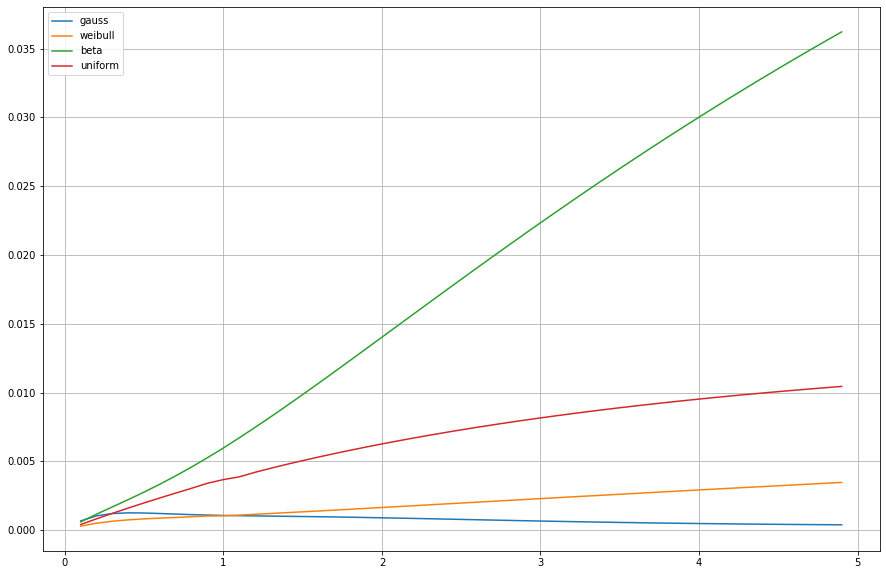

In [7]:
x = np.arange(0.1,5,0.1)

plt.figure(figsize=(15,10))

plt.plot(x,gauss_renyi,label="gauss")
plt.plot(x,weibull_renyi,label="weibull")
plt.plot(x,beta_renyi,label="beta")
plt.plot(x,uniform_renyi,label="uniform")

plt.legend()
plt.grid()

plt.show()

# HISTOGRAMI
    
Poglejmo, kako se obnašajo histogrami po JRD z 15 stolpci.

In [20]:
def hist_to_fun(histogram):
            # histogram: nabor oblike (heights, edges) - stolpci in meje stolpcev histograma
            # RETURN: funkcija, ki ustreza argumentu histogram
            
            def nested(x, hist):
                [heights, edges] = hist
                # kjer ima histogram vrednost 0, mu bomo zaradi racunanja v nadaljevanju priredili vrednost eps
                h_val = np.finfo(float).eps
                for i in range(len(edges)-1):
                    if (edges[i] <= x <= edges[i+1]):
                        if heights[i] != 0:
                            h_val = heights[i]
                        break
                return h_val
            fun = lambda x: nested(x, histogram)
            return fun
        
gauss_pdf = hist_to_fun(np.histogram(gauss,bins=18,density=1))
weibull_1_pdf = hist_to_fun(np.histogram(weibull,bins=16,density=1))
beta_1_pdf = hist_to_fun(np.histogram(beta_data,bins=15,density=1))
uniform_1_pdf = hist_to_fun(np.histogram(uniform_data,bins=11,density=1))

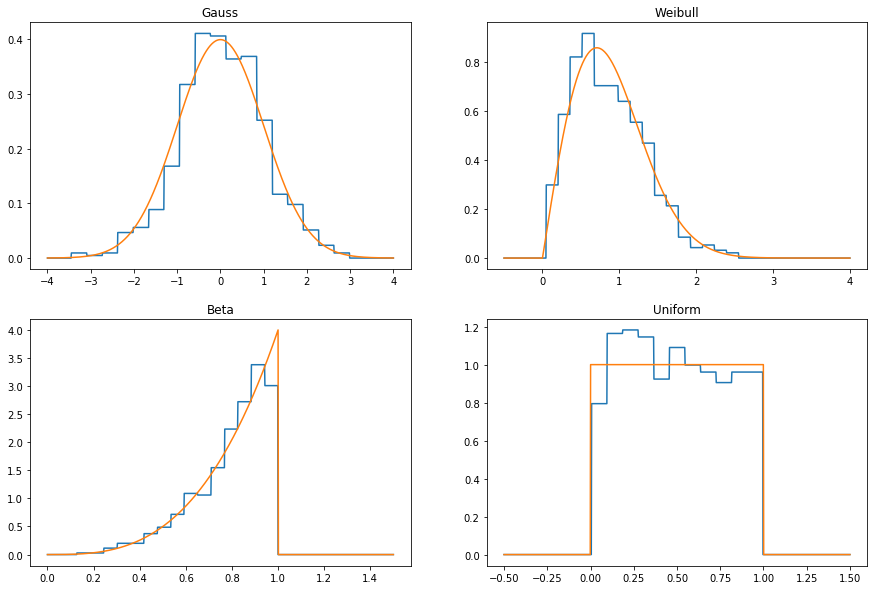

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Gauss")
# histogram
# plt.hist(gauss,10,density=1)
#pdf (gkde)
x = np.linspace(-4,4,1000)
plt.plot(x, [gauss_pdf(xi) for xi in x])
# tocna
plt.plot(x, gauss_tocna(x))


plt.subplot(2,2,2)
plt.title("Weibull")
# histogram
# plt.hist(weibull,10,density=1)
#pdf_na_int
x = np.linspace(-0.5,4,1000)
plt.plot(x, [weibull_1_pdf(xi) for xi in x])
# tocna
plt.plot(x, weibull_tocna(x))


plt.subplot(2,2,3)
plt.title("Beta")
# histogram
# plt.hist(beta_data,10,density=1)
#pdf_na_int
x = np.linspace(0,1.5,1000)
plt.plot(x, [beta_1_pdf(xi) for xi in x])
# tocna
plt.plot(x, beta_tocna(x))


plt.subplot(2,2,4)
plt.title("Uniform")
# histogram
# plt.hist(uniform_data,10,density=1)
#pdf_na_int
x = np.linspace(-0.5,1.5,1000)
plt.plot(x, [uniform_1_pdf(xi) for xi in x])
# tocna
plt.plot(x, uniform_tocna(x))


plt.show()

In [22]:
from renyi import renyi_divergence_cont, JRD_pdfs

def KL(p,q,a,b): return integrate.quad(lambda x: p(x)*np.log(p(x)/q(x)), a,b)[0]

gauss_renyi = []
weibull_renyi = []
beta_renyi = []
uniform_renyi = []

for i in np.arange(0.1,5,0.1):
    gauss_renyi.append(JRD_pdfs([gauss_tocna, gauss_pdf],i,minimum=min(gauss),maximum=max(gauss)))
    weibull_renyi.append(JRD_pdfs([weibull_tocna, weibull_1_pdf],i,minimum=min(weibull),maximum=max(weibull)))
    beta_renyi.append(JRD_pdfs([beta_tocna, beta_1_pdf],i,minimum=min(beta_data),maximum=max(beta_data)))
    uniform_renyi.append(JRD_pdfs([uniform_tocna, uniform_1_pdf],i,minimum=min(uniform_data),maximum=max(uniform_data)))
    print(i)

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)


0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return -integrate.quad(pdf_logpdf, minimum, maximum)[0]


1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0000000000000004
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9


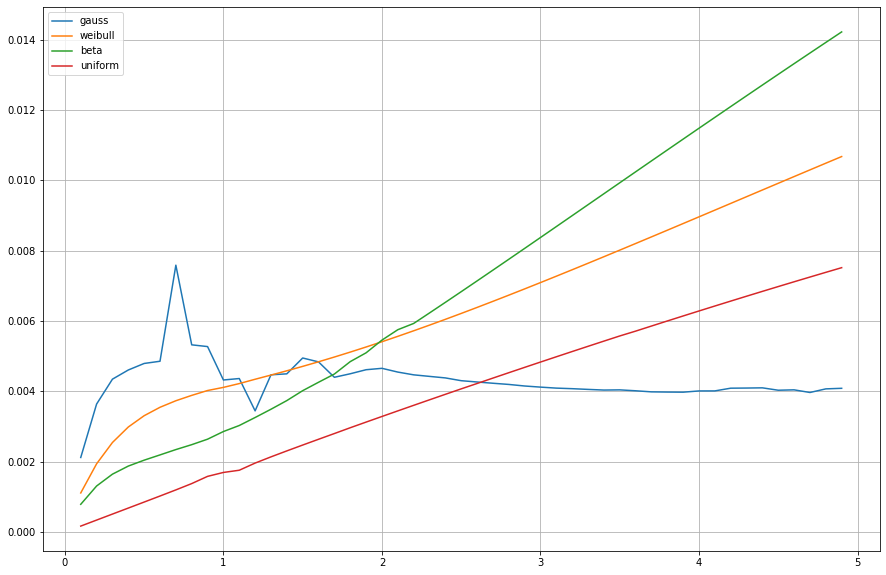

In [23]:
x = np.arange(0.1,5,0.1)

plt.figure(figsize=(15,10))

plt.plot(x,gauss_renyi,label="gauss")
plt.plot(x,weibull_renyi,label="weibull")
plt.plot(x,beta_renyi,label="beta")
plt.plot(x,uniform_renyi,label="uniform")

plt.legend()
plt.grid()

plt.show()

In [18]:
from optimalBinNumber import optBinNum

KLbinsGauss = optBinNum(gauss,"kl")
KLbinsWeibull = optBinNum(weibull,"kl")
KLbinsBeta = optBinNum(beta_data,"kl")
KLbinsUniform = optBinNum(uniform_data,"kl")

iskanje od 10 do 100:
10,

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/optimalBinNumber.py:80: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return scipy.integrate.quad(integrand, a, b)[0]


11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/optimalBinNumber.py:80: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(integrand, a, b)[0]


58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,



In [19]:
print(KLbinsGauss)
print(KLbinsWeibull)
print(KLbinsBeta)
print(KLbinsUniform)

18
16
15
11
